<h1> Principal Component Analysis 

In [57]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale

In [58]:
digit_data = load_digits()

In [59]:
pca = PCA(n_components=2)

In [60]:
pca.fit(digit_data.data)
reduced_data = pca.transform(digit_data.data)

In [61]:
pca.components_.shape

(2, 64)

In [62]:
dataD = pd.DataFrame()
dataD["First"] = reduced_data[:,0]
dataD["Second"] = reduced_data[:,1]
dataD['target'] = digit_data.target

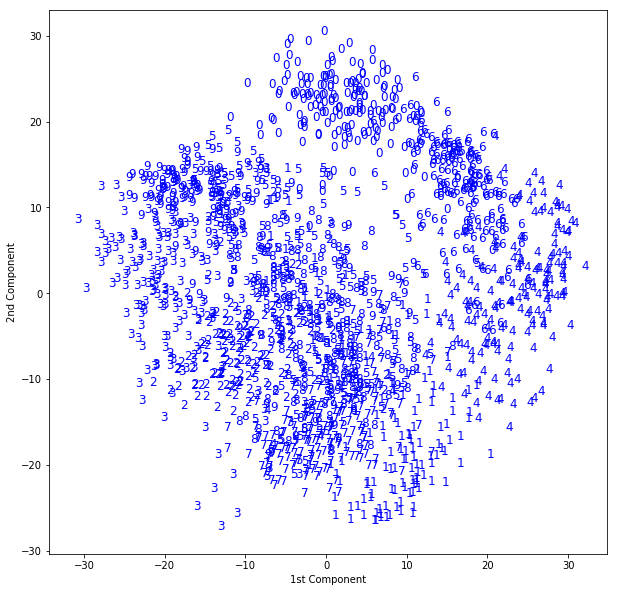

In [63]:
fig = plt.figure(figsize=(10,10))
plt.scatter(dataD.First, dataD.Second, facecolors='none')

for x, y,z in zip(dataD.First.tolist(), dataD.Second.tolist(), dataD.target.tolist()):
    plt.text(x, y, str(z), color="b" ,fontsize=12)
fig_size=[400,400]
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.show()

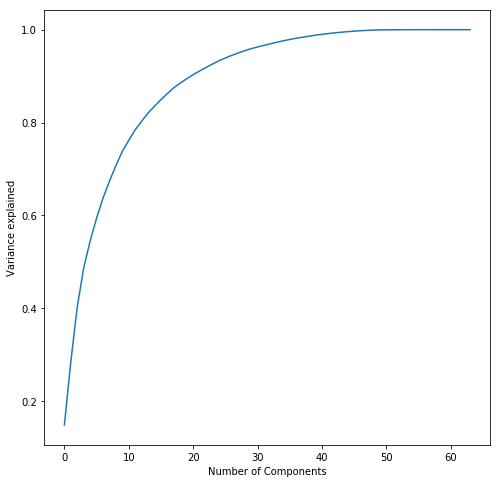

In [64]:
import numpy as np
fig = plt.figure(figsize=(8,8))
plt.plot(np.cumsum(PCA().fit(digit_data.data).explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance explained')
plt.show()

In [65]:
print("The percentage of variance captured by each of the two components ", pca.explained_variance_ratio_)

The percentage of variance captured by each of the two components  [0.14890594 0.13618771]


 <h3>Looking at the percentage of variance captured by the two components, we see that both the components combined capture a variance of about 28%. This is definitely not sufficient. Looking at the graph given above, we can see that when the number of components increases, the percentage of variance explained also increases sharply. Dependent on the percentage of variance to be explained, we can pick a suitable number of components. Thus, in this case we should find more components. <h3>

<h1> K-Mean Clustering without dimension Reduction</h1>

In [66]:
cluster_data = scale(digit_data.data)

In [67]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cluster_data, digit_data.target,test_size = 0.20)

In [68]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

clusterer = KMeans(10)
clusterer.fit(cluster_data)

predict = clusterer.predict(x_test)

confusion_matrix(y_test, predict)

array([[ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 5,  0, 19, 12,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  8,  0,  0,  0,  1,  0,  0, 13],
       [ 0,  0,  2,  0,  0,  0, 36,  0,  0,  1],
       [ 0,  3,  2, 36,  0,  2,  0,  0,  0,  0],
       [ 0,  1, 10,  0,  0,  0, 14,  0,  1,  9],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 29,  0],
       [ 0, 27,  0,  1,  0,  3,  0,  0,  0,  1],
       [ 0,  0, 26,  0,  0,  0,  8,  0,  2,  0],
       [ 0,  3,  1,  2,  0,  1, 37,  0,  0,  0]], dtype=int64)

<h1> K-Mean Clustering with dimension Reduction</h1>

In [69]:
cluster_data = scale(reduced_data)

In [70]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cluster_data, digit_data.target,test_size = 0.20)

In [71]:
clusterer = KMeans(10)
clusterer.fit(cluster_data)

predict = clusterer.predict(x_test)

confusion_matrix(y_test, predict)

array([[ 0,  0,  1,  3,  0, 29,  0,  0,  0,  0],
       [15,  3,  2,  0,  0,  0,  3,  5,  0, 18],
       [ 0,  3,  0,  0, 20,  0,  0,  5,  1,  0],
       [ 0,  5,  0,  0, 10,  0,  2,  3, 20,  0],
       [ 2,  0, 25,  2,  0,  0,  2,  0,  0,  1],
       [11, 12,  0,  1,  1,  1,  5,  7,  0,  0],
       [ 0,  0,  6, 24,  0,  1,  0,  0,  0,  0],
       [ 8,  0,  0,  0,  0,  0, 25,  0,  0,  9],
       [13,  3,  0,  0,  1,  0,  4, 14,  0,  0],
       [ 4, 17,  0,  0,  2,  0,  2,  4,  5,  0]], dtype=int64)

<h2><center> Plot for predicted values by cluster </h2>

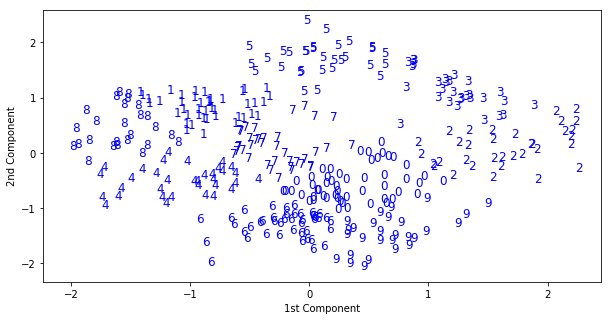

In [72]:
fig = plt.figure(figsize=(10,5))
plt.scatter(x_test[:,0], x_test[:,1], facecolors='none')

for x, y,z in zip(x_test[:,0], x_test[:,1], predict):
    plt.text(x, y, str(z), color="b" ,fontsize=12)
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.show()

<h2><center> Plot for actual values </h2>

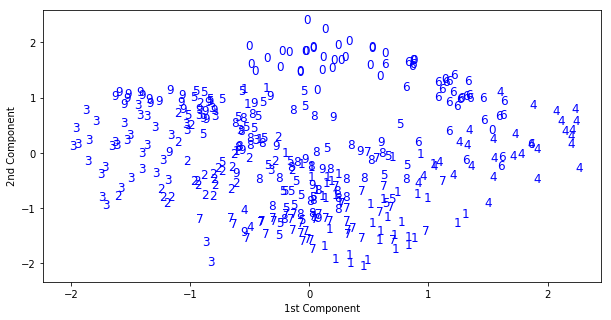

In [73]:
fig = plt.figure(figsize=(10,5))
plt.scatter(x_test[:,0], x_test[:,1], facecolors='none')

for x, y,z in zip(x_test[:,0], x_test[:,1], y_test):
    plt.text(x, y, str(z), color="b" ,fontsize=12)
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.show()

<h1> K-Mean Clustering without dimension Reduction</h1>

In [74]:
cluster_data = scale(digit_data.data)

In [75]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cluster_data, digit_data.target,test_size = 0.20)

In [76]:
clusterer = KMeans(10)
clusterer.fit(cluster_data)

predict = clusterer.predict(x_test)

confusion_matrix(y_test, predict)

array([[ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0, 19,  4,  0],
       [14,  2,  0,  0,  0,  1,  0,  5,  4,  0],
       [ 3, 31,  3,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0,  1,  0, 33],
       [ 1,  7,  0,  0,  0, 21,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  1,  0,  0],
       [ 0,  0, 37,  2,  0,  0,  0,  0,  0,  0],
       [ 1, 17,  0,  0,  0, 13,  1, 14,  0,  0],
       [ 0, 39,  3,  0,  0,  3,  0,  2,  0,  0]], dtype=int64)

<b> Looking at the confusion matrices, we can see that the number of true positives using the data with reduced dimension is far lower than the one using wihtout the reduced dimension. One reason might be that the labels identified by the cluster, even though is correct per se, is not consistent with the target values.</b> 